# Project 554– Recommendation system

# Objective
Build a book recommendation system using the provided datasets "Users", "Books", and "Ratings". The system should generate features from the data and recommend books to users. The final model should be deployed using RShiny, Flask, or Streamlit.

## Data loading

Load the three datasets (Users, Books, and Ratings) into pandas DataFrames.

In [10]:
import pandas as pd

users_df = pd.read_csv('Users.csv',encoding='ISO-8859-1')
books_df = pd.read_csv('Books.csv',encoding='ISO-8859-1')
ratings_df = pd.read_csv('Ratings.csv',encoding='ISO-8859-1')

print("Users DataFrame head:")
display(users_df.head())
print("\nBooks DataFrame head:")
display(books_df.head())
print("\nRatings DataFrame head:")
display(ratings_df.head())

C:\Users\saich\AppData\Local\Temp\ipykernel_27564\4135568699.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Books.csv',encoding='ISO-8859-1')


Users DataFrame head:


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN



Books DataFrame head:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...



Ratings DataFrame head:


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


## Data exploration and preprocessing


Exploring each dataset to understand its structure, identify missing values, and analyze data types. Handle missing values in the Users dataset (location and age) and analyze the distribution of ratings and decide how to handle explicit (1-10) and implicit (0) ratings, this will let us take the potential data cleaning steps like removing duplicate entries or handling inconsistent data.



Lets print the concise summary of each dataframe and check for missing values in `users_df`, and examine the unique values and their counts in the 'Age' column of `users_df`.



In [13]:
print("Users DataFrame summary:")
users_df.info()

print("\nBooks DataFrame summary:")
books_df.info()

print("\nRatings DataFrame summary:")
ratings_df.info()

print("\nMissing values in Users DataFrame:")
display(users_df.isnull().sum())

print("\nUnique values and counts in 'Age' column of Users DataFrame:")
display(users_df['Age'].value_counts(dropna=False).sort_index())

Users DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB

Books DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L 

User-ID          0
Location         0
Age         110762
dtype: int64


Unique values and counts in 'Age' column of Users DataFrame:


Age
0.0         416
1.0         288
2.0         105
3.0          45
4.0          28
          ...  
231.0         1
237.0         1
239.0         1
244.0         1
NaN      110762
Name: count, Length: 166, dtype: int64


Analyze the distribution of book ratings, handle age outliers , handle missing age values in `users_df` by replacing values above 90 and below 5 with NaN and then imputing NaN with the median, and handle implicit ratings in `ratings_df` by removing them.



In [15]:
import numpy as np

print("\nValue counts of 'Book-Rating' column in Ratings DataFrame:")
display(ratings_df['Book-Rating'].value_counts().sort_index())

# Handle missing age values in users_df
users_df['Age'] = users_df['Age'].apply(lambda x: np.nan if x > 90 or x < 5 else x)


users_df['Age'] = users_df['Age'].fillna(users_df['Age'].median())


print("\nMissing values in Users DataFrame after handling Age:")
display(users_df.isnull().sum())

# Handle implicit ratings in ratings_df
ratings_df = ratings_df[ratings_df['Book-Rating'] != 0]
print("\nRatings DataFrame after removing implicit ratings:")
display(ratings_df.head())


Value counts of 'Book-Rating' column in Ratings DataFrame:


Book-Rating
0     651330
1       1601
2       2492
3       5445
4       8031
5      46953
6      33753
7      70018
8      95037
9      62101
10     71814
Name: count, dtype: int64


Missing values in Users DataFrame after handling Age:


User-ID     0
Location    0
Age         0
dtype: int64


Ratings DataFrame after removing implicit ratings:


,User-ID,ISBN,Book-Rating
1,276726,155061224,5
3,276729,052165615X,3
4,276729,521795028,6
6,276736,3257224281,8
7,276737,600570967,6


## Feature engineering


Now , lets explore potential features in `books_df` and `users_df` that can be generated from the datasets. Something like, user demographics, book genres, publication years, author popularity, etc. Decide on the features to be used for the recommendation system based on the chosen model approach.


In [17]:
print("Exploring features in books_df:")
print(books_df[['Year-Of-Publication', 'Publisher', 'Book-Author']].nunique()) #To Understand the diversity of the data (e.g., how many authors or publishers).

print("\nExploring features in users_df:")
print(users_df[['Location', 'Age']].nunique()) #Gives insights to understand how many different locations and ages are present in the user data.

# Example of extracting features from Location
users_df['Country'] = users_df['Location'].apply(lambda x: x.split(',')[-1].strip()) #extract only country from the location.
print("\nUnique countries in users_df:")
print(users_df['Country'].nunique())

# Example of categorizing Age
users_df['Age_Group'] = pd.cut(users_df['Age'], bins=[0, 18, 30, 50, 70, 100], labels=['0-17', '18-29', '30-49', '50-69', '70+']) #age brackets help understand the model generalize the age(usually such age groups have same interest,etc)
print("\nAge group distribution:")
print(users_df['Age_Group'].value_counts())


Exploring features in books_df:
Year-Of-Publication       202
Publisher               16806
Book-Author            102022
dtype: int64

Exploring features in users_df:
Location    57339
Age            86
dtype: int64

Unique countries in users_df:
710

Age group distribution:
Age_Group
30-49    178225
18-29     60267
50-69     23702
0-17      15131
70+        1533
Name: count, dtype: int64


## Missing Values

In [19]:
print("Missing values in books_df:")
print(books_df.isnull().sum())


Missing values in books_df:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


## Remove Books with Missing Critical Info

In [21]:
books_df.dropna(subset=['ISBN', 'Book-Title', 'Book-Author'], inplace=True)


In [22]:
print("Missing values after dropping rows with missing ISBN, Title, or Author:")
print(books_df[['ISBN', 'Book-Title', 'Book-Author']].isnull().sum())


Missing values after dropping rows with missing ISBN, Title, or Author:
ISBN           0
Book-Title     0
Book-Author    0
dtype: int64


In [23]:
print("Missing values in books_df after dropping rows:")
print(books_df.isnull().sum())


Missing values in books_df after dropping rows:
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [24]:
#Dropping rows with missing Publisher values

books_df.dropna(subset=['Publisher'], inplace=True)


In [25]:
# Filling with a placeholder image URL
placeholder_url = 'https://via.placeholder.com/150'
books_df['Image-URL-L'] = books_df['Image-URL-L'].fillna(placeholder_url)




In [26]:
print("Final missing value check:")
print(books_df.isnull().sum())


Final missing value check:
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


In [27]:
#  Merge ratings with books on ISBN
ratings_books_df = ratings_df.merge(books_df, on='ISBN')

#  Merge with users on User-ID
final_df = ratings_books_df.merge(users_df, on='User-ID')


In [28]:
print("Final merged dataset shape:", final_df.shape)
print("Missing values after merging:")
print(final_df.isnull().sum())


Final merged dataset shape: (351853, 14)
Missing values after merging:
User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Location               0
Age                    0
Country                0
Age_Group              0
dtype: int64


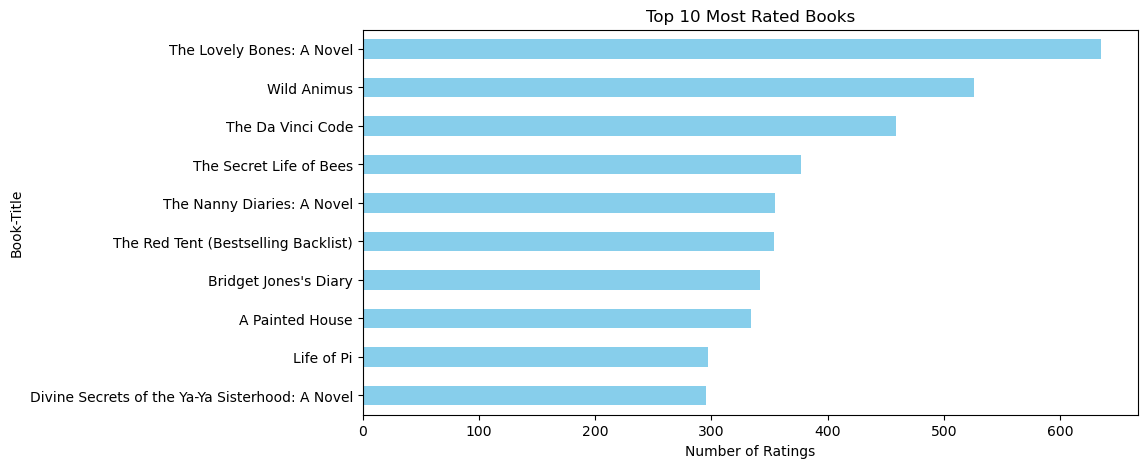

In [29]:
#Most Rated Books

import matplotlib.pyplot as plt

top_books = final_df['Book-Title'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_books.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.gca().invert_yaxis()
plt.show()



### Insights:

- "The Lovely Bones: A Novel" is the most rated book, followed by "Wild Animus" and "The Da Vinci Code".

- These books are either very popular, frequently promoted, or included in many users' libraries.

- This confirms a popularity bias, which is common in recommendation datasets.

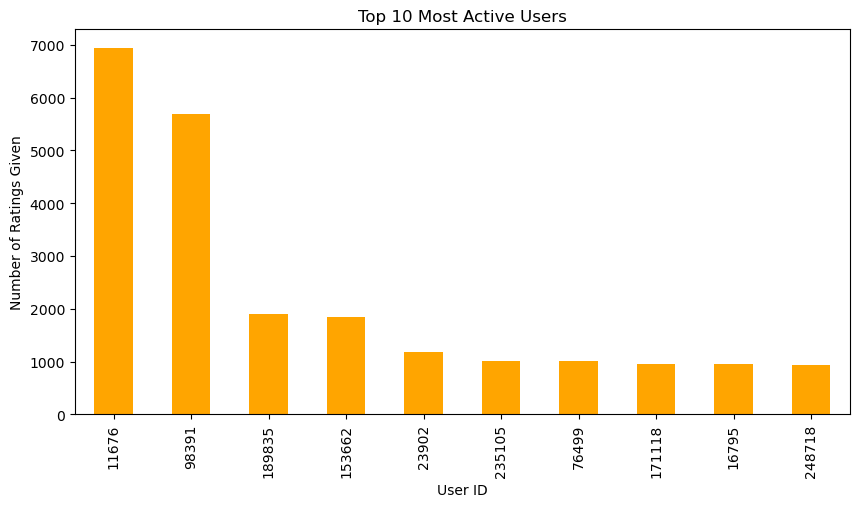

In [31]:
#Most Active Users
top_users = final_df['User-ID'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_users.plot(kind='bar', color='orange')
plt.title('Top 10 Most Active Users')
plt.ylabel('Number of Ratings Given')
plt.xlabel('User ID')
plt.show()


### Insights:

- One user (11676) has rated nearly 7,000 books, which is far above others this is likely an outlier.

- Other users also show high activity, suggesting a long tail of frequent raters.

C:\Users\saich\AppData\Local\Temp\ipykernel_27564\2620036736.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book-Rating', data=final_df, palette='viridis')


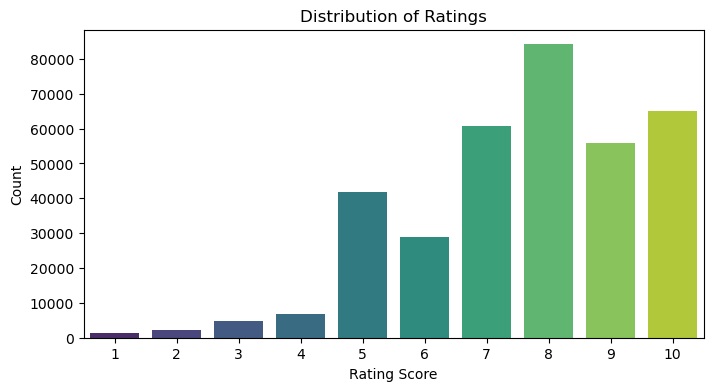

In [33]:
#Ratings Distribution
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(x='Book-Rating', data=final_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()


###Insights:

- Most users give high ratings: 8, 9, and 10 dominate.

- Very few ratings are 1–4.

- This indicates a positive skew, meaning users mostly give favorable reviews.

C:\Users\saich\AppData\Local\Temp\ipykernel_27564\671964653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=final_df, order=['0-17', '18-29', '30-49', '50-69', '70+'], palette='Set2')


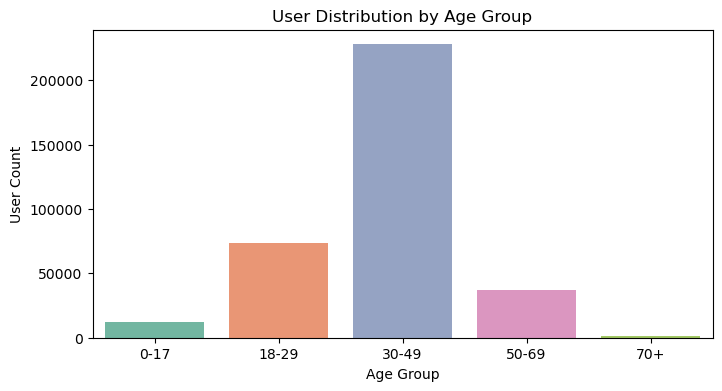

In [35]:
#Users by Age Group
plt.figure(figsize=(8,4))
sns.countplot(x='Age_Group', data=final_df, order=['0-17', '18-29', '30-49', '50-69', '70+'], palette='Set2')
plt.title('User Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('User Count')
plt.show()


### Insights:

- Most users fall in the 30–49 age bracket, followed by 18–29.

- Very few users in the 70+ and 0–17 groups.

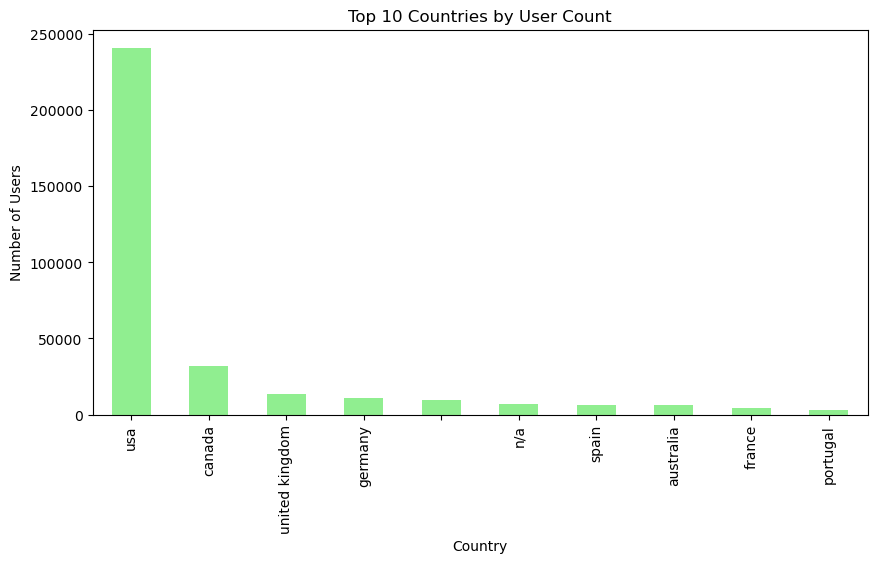

In [37]:
#Country-wise User Count
top_countries = final_df['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries by User Count')
plt.ylabel('Number of Users')
plt.xlabel('Country')
plt.show()


### Insights:

- USA dominates with a huge margin.

- Other countries (Canada, UK, Germany, etc.) have much fewer users.

- There’s a long tail of less-represented countries.

## Model Building

## Popularity Based Filtering

In [41]:
books = pd.read_csv('Books.csv',encoding='ISO-8859-1')
users = pd.read_csv('Users.csv',encoding='ISO-8859-1')
ratings = pd.read_csv('Ratings.csv',encoding='ISO-8859-1')


C:\Users\saich\AppData\Local\Temp\ipykernel_27564\592877685.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv',encoding='ISO-8859-1')


In [42]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


In [43]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [44]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [45]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
941107,250764,451410777,0,Sleep Tight (Onyx Book),Anne Frasier,2003,Onyx Books,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...
941108,250764,452264464,8,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
941109,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...
941110,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...


In [46]:
ratings_with_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941112 entries, 0 to 941111
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              941112 non-null  int64 
 1   ISBN                 941112 non-null  object
 2   Book-Rating          941112 non-null  int64 
 3   Book-Title           941112 non-null  object
 4   Book-Author          941110 non-null  object
 5   Year-Of-Publication  941112 non-null  object
 6   Publisher            941110 non-null  object
 7   Image-URL-S          941112 non-null  object
 8   Image-URL-M          941112 non-null  object
 9   Image-URL-L          941108 non-null  object
dtypes: int64(2), object(8)
memory usage: 71.8+ MB


In [47]:
ratings_with_name.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
dtype: int64

As there are very few null values, I will drop them.

In [49]:
ratings_with_name.dropna(inplace=True)

In [50]:
ratings_with_name.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [51]:
ratings_with_name['ISBN'].value_counts()

ISBN
971880107    2264
316666343    1164
385504209     813
312195516     668
60928336      662
             ... 
898654572       1
887069789       1
880386495       1
880384522       1
515069434       1
Name: count, Length: 257807, dtype: int64

## Feature Engineering

In [53]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [54]:
num_rating_df.rename(columns = {"Book-Rating":'Num-Ratings'},inplace=True)

In [55]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,Beyond IBM: Leadership Marketing and Finance ...,0.000000
4,Clifford Visita El Hospital (Clifford El Gran...,0.000000
...,...,...
230209,voyage fatal,0.000000
230210,waking blood,6.000000
230211,"wet sand, raven tracks",4.000000
230212,whataboutrick.com: a poetic tribute to Richard...,2.500000


In [56]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')

In [57]:
popular_df.rename(columns ={'Book-Rating':"Avg-Ratings"},inplace=True)

In [58]:
popular_df1 = popular_df[popular_df['Num-Ratings']>250].sort_values('Avg-Ratings',ascending=False).head(25)

In [59]:
popular_df1

,Book-Title,Num-Ratings,Avg-Ratings
76892,Harry Potter and the Goblet of Fire (Book 4),346,5.945087
76904,Harry Potter and the Prisoner of Azkaban (Book 3),380,5.884211
76896,Harry Potter and the Order of the Phoenix (Boo...,316,5.544304
76884,Harry Potter and the Chamber of Secrets (Book 2),501,5.177645
182960,The Hobbit : The Enchanting Prelude to The Lor...,261,4.969349
76915,Harry Potter and the Sorcerer's Stone (Harry P...,519,4.938343
178925,The Fellowship of the Ring (The Lord of the Ri...,340,4.885294
209869,To Kill a Mockingbird,463,4.684665
175304,The Da Vinci Code,828,4.679952
172433,The Catcher in the Rye,401,4.615960


num-ratings>250 gives more reliable recommendations, because when I used num-ratings > 500 the avg ratings became less than 3 meaning more people didnt like the book that much. So to get more reliable recommendation I used num-ratings >250

In [61]:
final_popular_df=popular_df1.merge(books,on = 'Book-Title')

In [62]:
final_popular_df

,Book-Title,Num-Ratings,Avg-Ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Goblet of Fire (Book 4),346,5.945087,439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
1,Harry Potter and the Goblet of Fire (Book 4),346,5.945087,439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),380,5.884211,439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Prisoner of Azkaban (Book 3),380,5.884211,439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
4,Harry Potter and the Prisoner of Azkaban (Book 3),380,5.884211,786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
...,...,...,...,...,...,...,...,...,...,...
100,Outlander,262,4.087786,440212561,DIANA GABALDON,1992,Dell,http://images.amazon.com/images/P/0440212561.0...,http://images.amazon.com/images/P/0440212561.0...,http://images.amazon.com/images/P/0440212561.0...
101,Outlander,262,4.087786,385302304,DIANA GABALDON,1991,Delacorte Press,http://images.amazon.com/images/P/0385302304.0...,http://images.amazon.com/images/P/0385302304.0...,http://images.amazon.com/images/P/0385302304.0...
102,Outlander,262,4.087786,553473298,DIANA GABALDON,1994,Random House Audio,http://images.amazon.com/images/P/0553473298.0...,http://images.amazon.com/images/P/0553473298.0...,http://images.amazon.com/images/P/0553473298.0...
103,Outlander,262,4.087786,930044177,Jane Rule,1981,Naiad Press,http://images.amazon.com/images/P/0930044177.0...,http://images.amazon.com/images/P/0930044177.0...,http://images.amazon.com/images/P/0930044177.0...


We can see that there are multiple books with same titles. we need to drop those duplicates and keep the original values.

In [64]:
final_popular_df.drop_duplicates('Book-Title',inplace=True)

In [65]:
final_popular_df

,Book-Title,Num-Ratings,Avg-Ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Goblet of Fire (Book 4),346,5.945087,439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),380,5.884211,439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
5,Harry Potter and the Order of the Phoenix (Boo...,316,5.544304,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
9,Harry Potter and the Chamber of Secrets (Book 2),501,5.177645,439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
12,The Hobbit : The Enchanting Prelude to The Lor...,261,4.969349,345339681,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...
13,Harry Potter and the Sorcerer's Stone (Harry P...,519,4.938343,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
15,The Fellowship of the Ring (The Lord of the Ri...,340,4.885294,345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
24,To Kill a Mockingbird,463,4.684665,446310786,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...
32,The Da Vinci Code,828,4.679952,385504209,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
38,The Catcher in the Rye,401,4.615960,316769487,J.D. Salinger,1991,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...


In [66]:
final_popular_df.columns

Index(['Book-Title', 'Num-Ratings', 'Avg-Ratings', 'ISBN', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [67]:
final_popular_df.drop(columns = ['Publisher','Image-URL-S','Image-URL-L'],inplace=True)

In [68]:
final_popular_df.reset_index(inplace=True)

In [69]:
final_popular_df.drop(columns='index',inplace=True)

## These are the Top 25 books which are most Popular.

In [71]:
final_popular_df

,Book-Title,Num-Ratings,Avg-Ratings,ISBN,Book-Author,Year-Of-Publication,Image-URL-M
0,Harry Potter and the Goblet of Fire (Book 4),346,5.945087,439139597,J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),380,5.884211,439136350,J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...
2,Harry Potter and the Order of the Phoenix (Boo...,316,5.544304,043935806X,J. K. Rowling,2003,http://images.amazon.com/images/P/043935806X.0...
3,Harry Potter and the Chamber of Secrets (Book 2),501,5.177645,439064872,J. K. Rowling,2000,http://images.amazon.com/images/P/0439064872.0...
4,The Hobbit : The Enchanting Prelude to The Lor...,261,4.969349,345339681,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339681.0...
5,Harry Potter and the Sorcerer's Stone (Harry P...,519,4.938343,059035342X,J. K. Rowling,1999,http://images.amazon.com/images/P/059035342X.0...
6,The Fellowship of the Ring (The Lord of the Ri...,340,4.885294,345339703,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339703.0...
7,To Kill a Mockingbird,463,4.684665,446310786,Harper Lee,1988,http://images.amazon.com/images/P/0446310786.0...
8,The Da Vinci Code,828,4.679952,385504209,Dan Brown,2003,http://images.amazon.com/images/P/0385504209.0...
9,The Catcher in the Rye,401,4.615960,316769487,J.D. Salinger,1991,http://images.amazon.com/images/P/0316769487.0...


In [252]:
final_popular_df['Image-URL-M']

0     http://images.amazon.com/images/P/0439139597.0...
1     http://images.amazon.com/images/P/0439136350.0...
2     http://images.amazon.com/images/P/043935806X.0...
3     http://images.amazon.com/images/P/0439064872.0...
4     http://images.amazon.com/images/P/0345339681.0...
5     http://images.amazon.com/images/P/059035342X.0...
6     http://images.amazon.com/images/P/0345339703.0...
7     http://images.amazon.com/images/P/0446310786.0...
8     http://images.amazon.com/images/P/0385504209.0...
9     http://images.amazon.com/images/P/0316769487.0...
10    http://images.amazon.com/images/P/0142001740.0...
11    http://images.amazon.com/images/P/0786868716.0...
12    http://images.amazon.com/images/P/0316666343.0...
13    http://images.amazon.com/images/P/0451524934.0...
14    http://images.amazon.com/images/P/0671461494.0...
15    http://images.amazon.com/images/P/0060392452.0...
16    http://images.amazon.com/images/P/0312195516.0...
17    http://images.amazon.com/images/P/03854845

In [72]:
import joblib
joblib.dump(final_popular_df,"Most_Popular_Books.pkl")

['Most_Popular_Books.pkl']

In [200]:
len(final_popular_df)

25

## User-based collaborative Filtering

In [74]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [75]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [76]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


We need to have a data frame which contains user in the columns and books in the rows and ratings in their values for collaborative filtering like shown below:

Here the values in the above table are ratings given by the user for the book. 

In [79]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
941107,250764,451410777,0,Sleep Tight (Onyx Book),Anne Frasier,2003,Onyx Books,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...
941108,250764,452264464,8,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
941109,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...
941110,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...


In [80]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
knowledgable_users = x[x].index

In [81]:
knowledgable_users

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       249111, 249628, 249862, 249894, 250184, 250405, 250764, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=737)

In [82]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(knowledgable_users)]

In [83]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1153,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1154,277427,26217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1155,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1156,277427,30615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1157,277427,60002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...,...,...
941107,250764,451410777,0,Sleep Tight (Onyx Book),Anne Frasier,2003,Onyx Books,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...
941108,250764,452264464,8,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
941109,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...
941110,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...


In [84]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
y[y]

Book-Title
1984                                                                 True
1st to Die: A Novel                                                  True
2nd Chance                                                           True
4 Blondes                                                            True
A Bend in the Road                                                   True
                                                                     ... 
Year of Wonders                                                      True
You Belong To Me                                                     True
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values    True
Zoya                                                                 True
\O\" Is for Outlaw"                                                  True
Name: Book-Rating, Length: 603, dtype: bool

In [85]:
famous_books = y[y].index

In [86]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Moon', 'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=603)

In [87]:
final_ratings_df = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [88]:
final_ratings_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1153,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1166,277427,60930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1168,277427,60934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1171,277427,61009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1177,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
941065,250764,446364673,0,The Gift,Kirk Douglas,1993,Warner Books,http://images.amazon.com/images/P/0446364673.0...,http://images.amazon.com/images/P/0446364673.0...,http://images.amazon.com/images/P/0446364673.0...
941086,250764,449907481,0,A Thousand Acres (Ballantine Reader's Circle),JANE SMILEY,1992,Ballantine Books,http://images.amazon.com/images/P/0449907481.0...,http://images.amazon.com/images/P/0449907481.0...,http://images.amazon.com/images/P/0449907481.0...
941093,250764,451180410,0,Mortal Fear,Greg Iles,1998,Signet Book,http://images.amazon.com/images/P/0451180410.0...,http://images.amazon.com/images/P/0451180410.0...,http://images.amazon.com/images/P/0451180410.0...
941095,250764,451191013,0,The Regulators,Stephen King,2002,Signet Book,http://images.amazon.com/images/P/0451191013.0...,http://images.amazon.com/images/P/0451191013.0...,http://images.amazon.com/images/P/0451191013.0...


In [89]:
Pivot_df = final_ratings_df.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [90]:
Pivot_df

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,249111,249628,249862,249894,250184,250405,250764,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filling all the NULL values with 0 to apply cosine similarity, which helps us find similar users

In [92]:
Pivot_df.fillna(0,inplace=True)

In [93]:
Pivot_df

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,249111,249628,249862,249894,250184,250405,250764,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As we can see there are 603 books which are popular and 735 users who have rated more than 200 books meaning they are knowledeagble which means their ratings can be trusted.

 Now lets apply cosine distances for every user to find which users are similar which can be determined by smallest distance between each other.

In [96]:
from sklearn.metrics.pairwise import cosine_similarity

In [97]:
Similarity_scores = cosine_similarity(Pivot_df)

In [98]:
Similarity_scores[0] # this is similarity score of Book(1984) with every user.

array([1.        , 0.11013674, 0.0127091 , 0.        , 0.05618727,
       0.03068486, 0.0874928 , 0.15837741, 0.03352553, 0.03769765,
       0.07734131, 0.02289102, 0.10711257, 0.08534426, 0.11769018,
       0.0557728 , 0.02587927, 0.12651909, 0.        , 0.14733114,
       0.08388437, 0.07732577, 0.09389112, 0.        , 0.07642162,
       0.14517437, 0.12847808, 0.01638712, 0.09117911, 0.05011953,
       0.01653141, 0.10104308, 0.01975371, 0.0268319 , 0.0885619 ,
       0.12161054, 0.06009405, 0.08965023, 0.01517732, 0.09520085,
       0.05637857, 0.27779439, 0.10570014, 0.01038525, 0.09208417,
       0.        , 0.04592574, 0.02005129, 0.        , 0.06136685,
       0.00604602, 0.08465384, 0.05775924, 0.1985691 , 0.        ,
       0.01346916, 0.03154015, 0.04679173, 0.08915014, 0.        ,
       0.13920242, 0.06799777, 0.        , 0.11604696, 0.03040797,
       0.05247255, 0.07067691, 0.12127148, 0.03442769, 0.01540805,
       0.2660586 , 0.        , 0.10733528, 0.09150259, 0.03182

The lesser the distance between two users higher their similarity score. Higher Similarity scores indicates that users are similar.

In [100]:
Pivot_df

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,249111,249628,249862,249894,250184,250405,250764,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finding index of a Book title.

In [192]:
import joblib 
joblib.dump(Similarity_scores,"Similarity_scores.pkl")

['Similarity_scores.pkl']

In [194]:
import joblib
joblib.dump(Pivot_df,"User_Based.pkl")

['User_Based.pkl']

In [246]:
book_titles = Pivot_df.index.tolist()

In [250]:
joblib.dump(book_titles,"Book-Titles.pkl")

['Book-Titles.pkl']

In [ ]:
import joblib
joblib.dump(Pivot_df['Book-Title'])

In [103]:
index1 = np.where(Pivot_df.index == 'Zoya')[0][0] 
index1

601

Finding most similar books by their index.

In [105]:
similar_items1 = sorted(list(enumerate(Similarity_scores[1])),key = lambda x:x[1],reverse=True)[1:6] 

In [106]:
similar_items1

[(34, 0.3209377366263928),
 (254, 0.28373402266420134),
 (299, 0.27903746938224816),
 (30, 0.27401325075307853),
 (569, 0.2685460935097372)]

Converting most similar book index to their respective names.

In [108]:
for i in similar_items1:
    print(Pivot_df.index[i[0]])

Along Came a Spider (Alex Cross Novels)
Lightning
On the Street Where You Live
All Around the Town
Violets Are Blue


In [109]:
def recommend(book_name):
    index = index = np.where(Pivot_df.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(Similarity_scores[index])),key = lambda x:x[1],reverse=True)[1:6]
    for i in similar_items:
        print(Pivot_df.index[i[0]])

In [204]:
recommend('The Lovely Bones: A Novel')

The Book of Ruth (Oprah's Book Club (Paperback))
Good in Bed
Life of Pi
The Pilot's Wife : A Novel
Where the Heart Is (Oprah's Book Club (Paperback))


In [111]:
recommend('The Two Towers (The Lord of the Rings, Part 2)')

The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Return of the King (The Lord of the Rings, Part 3)
The Hobbit : The Enchanting Prelude to The Lord of the Rings
It Was on Fire When I Lay Down on It
Harry Potter and the Prisoner of Azkaban (Book 3)


In [222]:
recommend("1984")

Animal Farm
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Handmaid's Tale
Fahrenheit 451


## As we can see our recommendation system is working really good.